In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file = r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\sfincs\03_OBS\analysis_final\downscale_test\pres_fut_Florence_hazard_exposure_piechart.csv'
data = pd.read_csv(file, index_col=0)
data['total'] = data.sum(axis=1)
pie_scale = [14000,14000,80000,80000,60,60]
data['scale'] = data['total'] / pie_scale
print(data)

                      Coastal       Runoff     Compound         total  \
index                                                                   
Present Extent      876.00000  13131.00000   2584.00000   16591.00000   
Future Extent       943.00000  14069.00000   4838.00000   19850.00000   
Present Building  20139.00000   1487.00000  19707.00000   41333.00000   
Future Building   23230.00000  19607.00000  57970.00000  100807.00000   
Present Road          0.21782     26.87722     13.24335      40.33839   
Future Road           8.90882     40.71077     31.52765      81.14724   

                     scale  
index                       
Present Extent    1.185071  
Future Extent     1.417857  
Present Building  0.516663  
Future Building   1.260088  
Present Road      0.672307  
Future Road       1.352454  


In [14]:
# Setup Plot Info
pie_scale = data['scale']
combined = data.drop(['total', 'scale'], axis=1)

In [15]:
def adjust_labels(texts, theta, r):
    for i, t in enumerate(texts):
        x = r * np.cos(theta[i])
        y = r * np.sin(theta[i])

        # Adjust horizontal alignment based on which side of the pie the label is on
        ha = 'left' if x >= 0 else 'right'

        # Adjust vertical alignment based on whether the label is above or below the pie
        va = 'bottom' if y >= 0 else 'top'

        t.set_ha(ha)
        t.set_va(va)

        # Move the label slightly away from the pie
        offset = 0.1
        t.set_position((x + np.sign(x) * offset, y + np.sign(y) * offset))

C:\Users\lelise\AppData\Local\miniconda3\envs\hydromt-sfincs-v1.1.0\Lib\site-packages\matplotlib_inline\backend_inline.py:27: UserWarning: The Figure parameters 'layout' and 'tight_layout' cannot be used together. Please use 'layout' only.
  return new_figure_manager_given_figure(num, FigureClass(*args, **kwargs))
C:\Users\lelise\AppData\Local\Temp\ipykernel_19824\857153642.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  radius=pie_scale[pie_scale.index == combined.index[i]][0],
C:\Users\lelise\AppData\Local\Temp\ipykernel_19824\857153642.py:41: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.0, hspace=0.0)


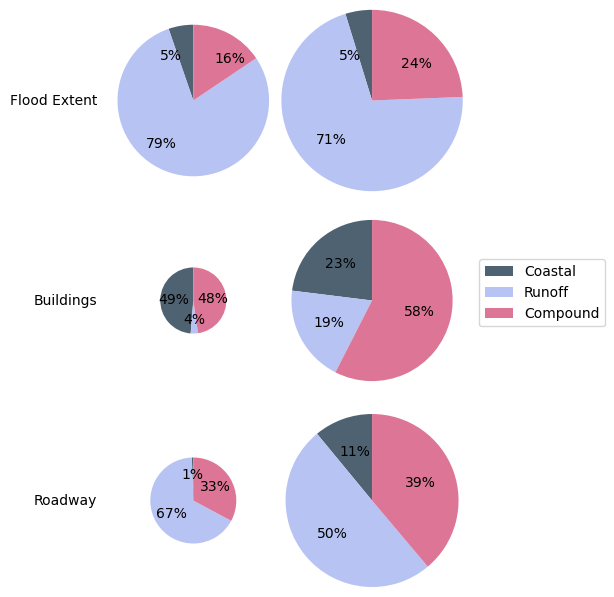

In [17]:
row_labels = ['Flood Extent', 'Buildings', 'Roadway']
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
nrow, ncol = 3, 2
n_subplots = nrow * ncol
first_in_row = np.arange(0, n_subplots, ncol)
last_row = np.arange(n_subplots - ncol, n_subplots, 1)
fig, axs = plt.subplots(nrows=nrow,
                        ncols=ncol,
                        figsize=(6, 6),
                        tight_layout=True,
                        layout='constrained'
                        )
axs = axs.flatten()
for i in range(len(combined.index)):
    ax = axs[i]
    d = combined[combined.index == combined.index[i]]
    wedges, texts, autotexts = ax.pie(d.to_numpy()[0],
           colors=colors,
           radius=pie_scale[pie_scale.index == combined.index[i]][0],
           startangle=90,
           autopct='%1.0f%%',#pctdistance=0.5
           )
    theta = [((w.theta2 + w.theta1) / 2) / 180 * np.pi for w in wedges]
    if i <2:
        adjust_labels(texts, theta, 1.1)
        adjust_labels(autotexts, theta, 0.5)
for i in range(len(first_in_row)):
    axs[first_in_row[i]].text(-0.1, 0.5, row_labels[i],
                              horizontalalignment='right', verticalalignment='center',
                              rotation='horizontal',transform=axs[first_in_row[i]].transAxes)
#axs[0].set_title('Present')
#axs[1].set_title('Future')
legend_kwargs0 = dict(
    bbox_to_anchor=(2.0, 0.8),
    title=None,
    loc="upper right",
    frameon=True,
    prop=dict(size=10),
)
axs[3].legend(labels=combined.columns, **legend_kwargs0)
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.margins(x=0, y=0)
plt.savefig(r'Z:\Data-Expansion\users\lelise\projects\Carolinas_SFINCS\Chapter2_PGW\sfincs\03_OBS\analysis_final\downscale_test\hazard_exposure_Florence_pieChart_legend.jpg', bbox_inches='tight', dpi=300)